<a href="https://colab.research.google.com/github/chitransh1998/Card-Tampering-Screener/blob/main/Card_Tampering_Screener.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Card Tampering Screener

The purpose of this project is to detect tampering of an ID Card using Computer Vision.  
We take the example of a PAN Card here for an ID card.  
This project will help different organizations in detecting whether the ID provided to them by their employees or customers or anyone is original or not.

In [ ]:
#Import necessary packages
from skimage.metrics import structural_similarity #To find score between structural similarity of scores
import imutils
import cv2
from PIL import Image
import requests #To take data from different URLs

In [ ]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

In [ ]:
#Open image and display
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream = True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream = True).raw)


Loading original and user provided images.

In [ ]:
#The file format of the source file.
print("Original image format : ", original.format)
print("Tampered image format : ", tampered.format)

#Image size in pixel.
print("Original image size: ", original.size)
print("Tampered image size: ", tampered.size)

Original image format :  JPEG
Tampered image format :  PNG
Original image size:  (1200, 800)
Tampered image size:  (282, 179)


Converting images to same size and format

In [ ]:
#Resize image
original = original.resize((250, 160))
print(original.size)
original.save('pan_card_tampering/image/original.png') #Save Image
tampered = tampered.resize((250, 160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png') #Save image

(250, 160)
(250, 160)


Displaying the original and tampered images

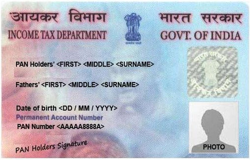

In [ ]:
# Display Original Image
original

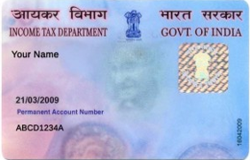

In [ ]:
# Display Tampered Image
tampered

The user provided image which will be comapred with PAN card

In [ ]:
#Load the two input images using CV2
original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')

Converting the images into GrayScale using OpenCV.
As Coloured images are complex to understand by machine as they have 3 channels while grayscale has only 1 channel

In [ ]:
#Convert images to Grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [ ]:
#Compute Structural Similarity Index between the two images
(score, diff) = structural_similarity(original_gray, tampered_gray, full = True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.31686135690489126


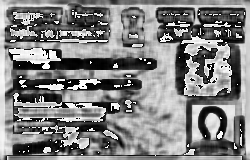

In [ ]:
#Showing the difference image
from google.colab.patches import cv2_imshow
cv2_imshow(diff)

Structural similarity index (SSIM) helps us determine exactly where in terms of x,y coordinates, the image differences are.
Lower the SSIM score, lower is the similarity

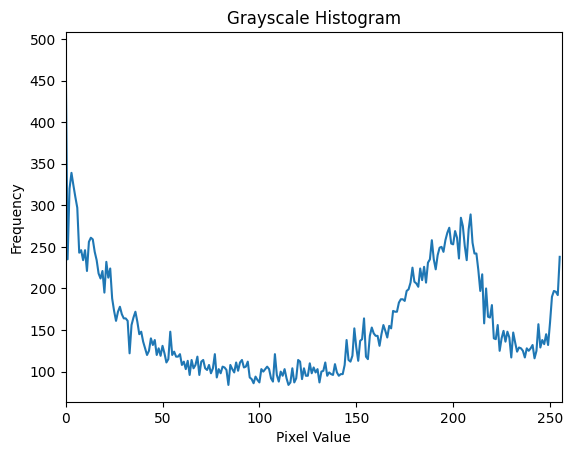

In [ ]:
from matplotlib import pyplot as plt
# Calculate histogram
histogram = cv2.calcHist([diff], [0], None, [256], [0, 256])

# Plot histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(histogram)
plt.xlim([0, 256])
plt.show()

From the above histogram of the diff image we can see an approximately bimodel distribution, hence we use Otsu Thresholding method for Thresholding.

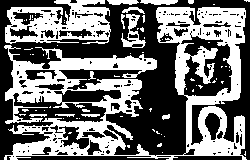

In [ ]:
#Calculating thresholds
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cv2_imshow(thresh)

Next, we find the contours which are useful tool for shape analysis and recognition. The grab_contours grabs the appropriate value of the contours

In [ ]:
#Finding the Contours
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

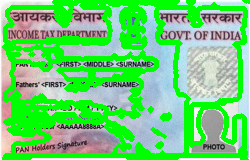

In [ ]:
#Drawing the contours
cnt_img = cv2.drawContours(original.copy(), cnts, -1, (0, 255, 0), 3)
cv2_imshow(cnt_img)

Bounding Rectangle helps in finding ratio of width to height of bounding rectangle of the object. We compute bounding box of the contour and draw bounding box on both input images to represent where the two images are different or not.

In [ ]:
#Loop over the contours
for c in cnts:
  #Applying contours on image
  (x, y, w, h) = cv2.boundingRect(c)
  cv2.rectangle(original, (x,y), (x + w, y + h), (0, 0, 255), 2)
  cv2.rectangle(tampered, (x,y), (x + w, y + h), (0, 0, 255), 2)

Original Format Image


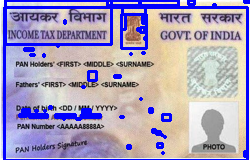

In [ ]:
#Display Original image with contour
print('Original Image')
Image.fromarray(original)

Tampered Image


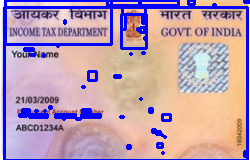

In [ ]:
#Display Tampered image with contour
print('Tampered Image')
Image.fromarray(tampered)

From the contour images we don't see much difference between the two images

Different Image


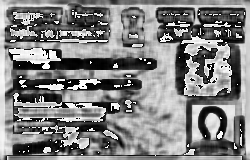

In [ ]:
#Display difference image with black
print('Different Image')
Image.fromarray(diff)

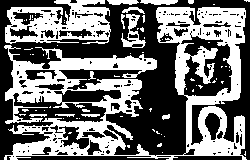

In [ ]:
#Display Threshold Image with white
Image.fromarray(thresh)

# Summary

From the Threshold version of the difference image as well a structural similarity score of ~31.2% we can say that both the images are different, and the image user provided us is fake or tampered.

# Scope

This project can be used in different organizations where customers or users need to provide any kind of id in order to get themselved verified. The organization can use this project to find out whether the ID is original or fake. Similarly this can be used for any type of ID like Aadhar, Voter ID, etc.